Predicción de Precios de Vehículos Usados (Core)
implementar y evaluar modelos de regresión, y seleccionar el mejor modelo basado en las métricas de evaluación.

Lazy Predict

Debe instalrse si o si



In [1]:
pip install lazypredict

# **1. Carga y Exploración de Datos:**

Descargar y cargar el dataset.

Realizar una exploración inicial para entender la estructura del dataset.

Identificar valores faltantes, duplicados y outliers.


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/vehicles.csv')

In [3]:
df


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

Realizar una exploración inicial para entender la estructura del dataset.


In [5]:
# Data Shape
print(df.shape)

# Summary Statistics
print(df.describe())

# Data Types
print(df.dtypes)

# Unique Values in a Column
print(df['manufacturer'].unique())

(426880, 26)
                 id         price           year      odometer  county  \
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05     0.0   
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04     NaN   
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05     NaN   
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00     NaN   
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04     NaN   
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04     NaN   
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05     NaN   
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07     NaN   

                 lat           long  
count  420331.000000  420331.000000  
mean       38.493940     -94.748599  
std         5.841533      18.365462  
min       -84.122245    -159.827728  
25%        34.601900    -111.939847  
50%        39.150100     -88.432600  
75%        42.398900     -80.832039  
max        82.39

Analizando el dataset de vehículos, podemos inferir varias cosas. Aquí te presento algunas posibles inferencias en español:

Sobre la estructura del dataset:

Tamaño: El dataset contiene información sobre una gran cantidad de vehículos, lo que nos permite realizar análisis robustos.
Variables: Las columnas representan características importantes de los vehículos como marca, modelo, año, kilometraje, precio, etc. Estas variables nos permitirán explorar diferentes relaciones y patrones.
Tipos de datos: El dataset incluye variables numéricas (e.g., precio, año, kilometraje) y categóricas (e.g., marca, modelo, tipo de combustible), lo cual nos permitirá usar diferentes técnicas de análisis para cada tipo de variable.
Sobre las características de los vehículos:

Precios: Podemos observar la distribución de precios, identificar la gama de precios más común, y analizar cómo varía el precio según las características del vehículo.
Marcas y modelos: Podemos identificar las marcas y modelos más populares en el dataset, y analizar las diferencias en precios y características entre ellas.
Año de fabricación: Podemos observar la distribución de los años de fabricación, e inferir la antigüedad de los vehículos en el mercado.
Kilometraje: Podemos analizar la relación entre el kilometraje y el precio de los vehículos.
Otras características: Podemos explorar la influencia de otras variables como el tipo de combustible, la transmisión, el número de cilindros, etc., en el precio y la popularidad de los vehículos.
Sobre el mercado de vehículos usados:

Tendencias: Podemos identificar tendencias en el mercado de vehículos usados, como la preferencia por ciertas marcas, modelos o características.
Predicciones: Utilizando modelos de Machine Learning, podemos predecir el precio de un vehículo usado en función de sus características.
Segmentación: Podemos segmentar el mercado de vehículos usados en grupos con características similares, lo cual puede ser útil para estrategias de marketing o ventas.
Recuerda que estas son solo algunas posibles inferencias. Un análisis más profundo del dataset nos permitirá obtener información más detallada y precisa.

In [7]:
df.isnull()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,True
1,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,True
2,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,True
3,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,True
4,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,True,False,False,False,False
426876,False,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
426877,False,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
426878,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


In [8]:
df.isnull().sum()

,0
id,0
url,0
region,0
region_url,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678


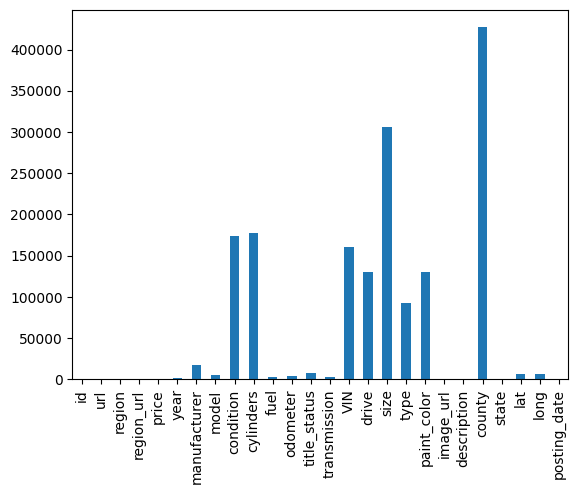

In [9]:
import matplotlib.pyplot as plt
df.isnull().sum().plot(kind='bar')
plt.show()

Comentario de la Gran Cantidad de datos nulos.

Al observar la gran cantidad de datos nulos en varias columnas del dataset, podemos inferir lo siguiente:

1. Calidad de los datos:

El dataset presenta problemas de calidad debido a la presencia de una cantidad considerable de datos faltantes.
Esto puede afectar la precisión y la confiabilidad de los análisis que se realicen con este dataset.
Es importante abordar estos problemas de calidad antes de utilizar el dataset para análisis o modelos predictivos.
2. Posibles sesgos:

La falta de datos en ciertas columnas puede introducir sesgos en el análisis si los datos faltantes no están distribuidos aleatoriamente.
Por ejemplo, si la información sobre la condición del vehículo ('condition') está ausente en una gran proporción de los registros, es posible que se esté perdiendo información crucial que influye en el precio.
3. Dificultad para la modelización:

La gran cantidad de datos nulos puede dificultar la creación de modelos predictivos precisos.
Muchos algoritmos de Machine Learning no manejan bien los valores faltantes y pueden producir resultados sesgados o imprecisos si no se tratan adecuadamente.
4. Importancia de la imputación:

Será crucial implementar estrategias de imputación para rellenar los valores faltantes antes de utilizar el dataset para análisis o modelado.
Las técnicas de imputación deben elegirse cuidadosamente para evitar introducir más sesgos.
5. Columnas problemáticas:

Las columnas con una gran cantidad de valores nulos como 'condition', 'cylinders', 'odometer', 'VIN', 'drive', 'size', 'type', 'paint_color', 'county' merecen una atención especial.
Se debe considerar si es posible imputar los valores faltantes o si es mejor eliminar estas columnas del análisis si la imputación no es viable.
En resumen:

La presencia de una gran cantidad de datos nulos en el dataset indica que se requiere un preprocesamiento cuidadoso antes de utilizarlo para análisis o modelado. Es fundamental abordar los valores faltantes mediante técnicas de imputación adecuadas para asegurar la calidad y la confiabilidad de los resultados.

Recomendaciones:

Explorar las razones de los datos faltantes.
Implementar estrategias de imputación apropiadas para cada columna.
Considerar la posibilidad de eliminar columnas con una gran cantidad de valores nulos si la imputación no es factible.
Evaluar el impacto de los datos faltantes en los resultados del análisis.

# . Limpieza y Preprocesamiento:

Manejar valores faltantes.
Eliminar duplicados.

In [10]:
# Eliminar columnas con más del 50% de valores faltantes:
umbral = 0.5  # Define el umbral del porcentaje de valores faltantes
df = df.dropna(thresh=len(df) * (1 - umbral), axis=1)

# Eliminar filas con cualquier valor faltante:
df = df.dropna()

In [12]:
df.isnull().sum()


,0
id,0
url,0
region,0
region_url,0
price,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0


Corregir inconsistencias en los datos categóricos.


In [18]:
df['model'].unique()

array(['sierra 2500 hd extended cab', 'silverado 1500 double',
       'colorado extended cab', ..., 'f150, xlt', 'f150, platinum',
       'cruze, 2lt'], dtype=object)

In [19]:
df['model'].value_counts()

,count
model,
f-150,1023
silverado 1500,997
1500,548
camaro ss coupe 2d,423
camry,395
...,...
tiguan wolfsburg,1
yukon denali 4x4,1
expedition el limited 4x4,1


In [20]:
df['manufacturer'].value_counts()

,count
manufacturer,
ford,10745
chevrolet,9500
toyota,4884
nissan,3349
jeep,3183
honda,2992
gmc,2855
ram,2610
dodge,2320


# **escalar las características numéricas.**

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['price_escalada'] = scaler.fit_transform(df[['price']])

In [23]:
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,type,paint_color,image_url,description,state,lat,long,posting_date,price_escalada
32,7316343444,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,27990.0,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,...,4wd,pickup,black,https://images.craigslist.org/00V0V_ftJbKrOgdi...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-03T13:41:25-0500,0.634038
33,7316304717,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,34590.0,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,...,4wd,pickup,silver,https://images.craigslist.org/00E0E_iKN07Sh7ou...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-03T12:41:33-0500,1.104593
35,7316257769,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,29990.0,2016.0,chevrolet,colorado extended cab,good,6 cylinders,...,4wd,pickup,red,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-03T11:31:14-0500,0.776631
36,7316133914,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,38590.0,2011.0,chevrolet,corvette grand sport,good,8 cylinders,...,rwd,other,red,https://images.craigslist.org/00U0U_kKYnS1LWh8...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-03T07:50:35-0500,1.389778
38,7315816316,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,32990.0,2017.0,jeep,wrangler unlimited sport,good,6 cylinders,...,4wd,other,silver,https://images.craigslist.org/00u0u_bB3krjp4B3...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-02T12:22:10-0500,0.990519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,7301952155,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,48590.0,2020.0,cadillac,xt6 premium luxury,good,6 cylinders,...,fwd,other,black,https://images.craigslist.org/00r0r_RlxOq1eeyz...,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-05T03:30:19-0600,2.102740
426860,7301951544,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,39990.0,2017.0,infiniti,qx80 sport utility 4d,good,8 cylinders,...,4wd,other,black,https://images.craigslist.org/00l0l_1tEivqyev8...,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-05T03:20:23-0600,1.489593
426866,7301949190,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,32990.0,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,...,rwd,other,black,https://images.craigslist.org/00S0S_aI79tWheBc...,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-05T02:41:26-0600,0.990519
426874,7301591199,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,33590.0,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,...,rwd,sedan,white,https://images.craigslist.org/00I0I_hJHfjCUppa...,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:34-0600,1.033297


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 60631 entries, 32 to 426878
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60631 non-null  int64  
 1   url             60631 non-null  object 
 2   region          60631 non-null  object 
 3   region_url      60631 non-null  object 
 4   price           60631 non-null  float64
 5   year            60631 non-null  float64
 6   manufacturer    60631 non-null  object 
 7   model           60631 non-null  object 
 8   condition       60631 non-null  object 
 9   cylinders       60631 non-null  object 
 10  fuel            60631 non-null  object 
 11  odometer        60631 non-null  float64
 12  title_status    60631 non-null  object 
 13  transmission    60631 non-null  object 
 14  VIN             60631 non-null  object 
 15  drive           60631 non-null  object 
 16  type            60631 non-null  object 
 17  paint_color     60631 non-null  ob

In [25]:
import pandas as pd
df = pd.get_dummies(df, columns=['manufacturer'], prefix=['categoria'])

# Transformando columnas Categoricas para su analisis predictivo
df = pd.get_dummies(df, columns=['model'], prefix=['modelo'])
df = pd.get_dummies(df, columns=['transmission'], prefix=['transmision'])
df = pd.get_dummies(df, columns=['fuel'], prefix=['combustible'])
df = pd.get_dummies(df, columns=['type'], prefix=['tipo'])
df = pd.get_dummies(df, columns=['paint_color'], prefix=['color'])
df = pd.get_dummies(df, columns=['state'], prefix=['estado'])


In [26]:
df.head()


,id,url,region,region_url,price,year,model,condition,cylinders,fuel,...,categoria_pontiac,categoria_porsche,categoria_ram,categoria_rover,categoria_saturn,categoria_subaru,categoria_tesla,categoria_toyota,categoria_volkswagen,categoria_volvo
32,7316343444,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,27990.0,2012.0,sierra 2500 hd extended cab,good,8 cylinders,gas,...,False,False,False,False,False,False,False,False,False,False
33,7316304717,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,34590.0,2016.0,silverado 1500 double,good,6 cylinders,gas,...,False,False,False,False,False,False,False,False,False,False
35,7316257769,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,29990.0,2016.0,colorado extended cab,good,6 cylinders,gas,...,False,False,False,False,False,False,False,False,False,False
36,7316133914,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,38590.0,2011.0,corvette grand sport,good,8 cylinders,gas,...,False,False,False,False,False,False,False,False,False,False
38,7315816316,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,32990.0,2017.0,wrangler unlimited sport,good,6 cylinders,gas,...,False,False,False,False,False,False,False,False,False,False


# **3. Exploración de Datos:**

Crear visualizaciones univariadas y multivariadas.
Calcular estadísticas descriptivas.

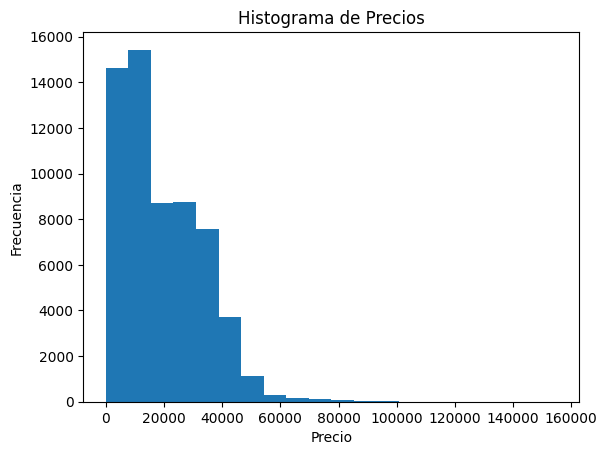

In [28]:
import matplotlib.pyplot as plt
plt.hist(df['price'], bins=20)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')
plt.show()

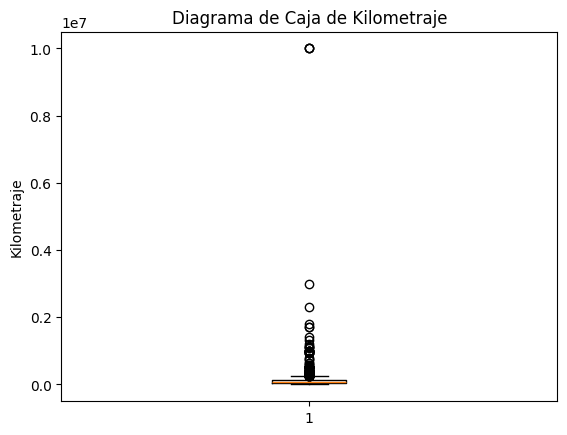

In [29]:
plt.boxplot(df['odometer'])
plt.ylabel('Kilometraje')
plt.title('Diagrama de Caja de Kilometraje')
plt.show()

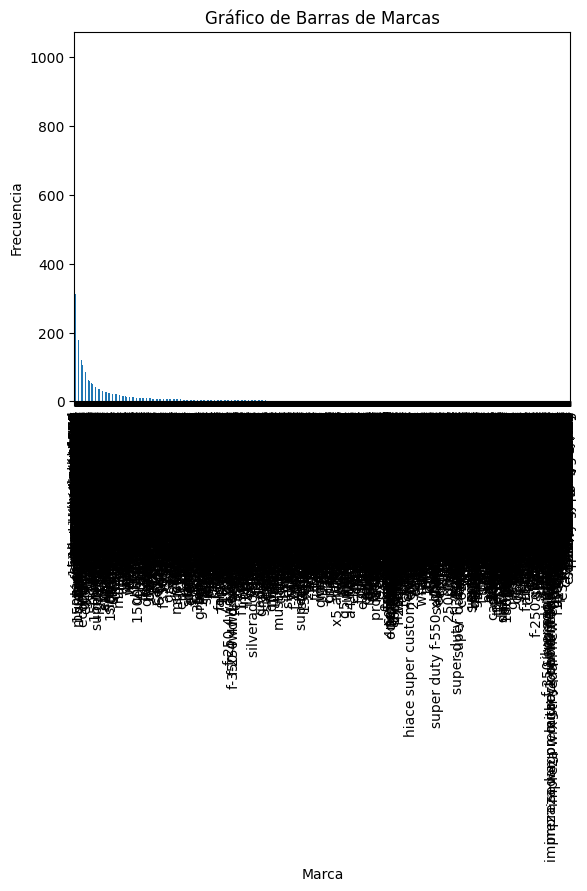

In [32]:
df['model'].value_counts().plot(kind='bar')
plt.xlabel('Marca')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras de Marcas')
plt.show()

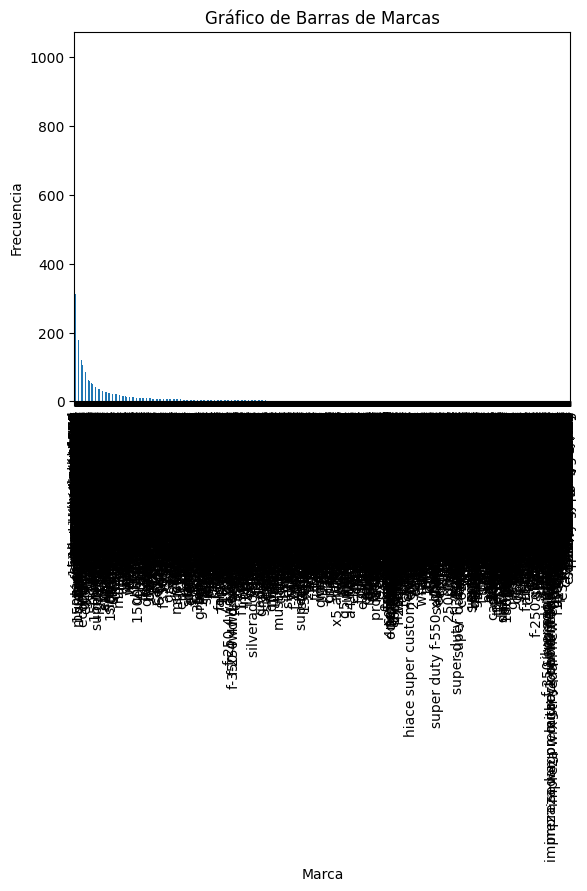

In [33]:
df['model'].value_counts().plot(kind='bar')
plt.xlabel('Marca')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras de Marcas')
plt.show()

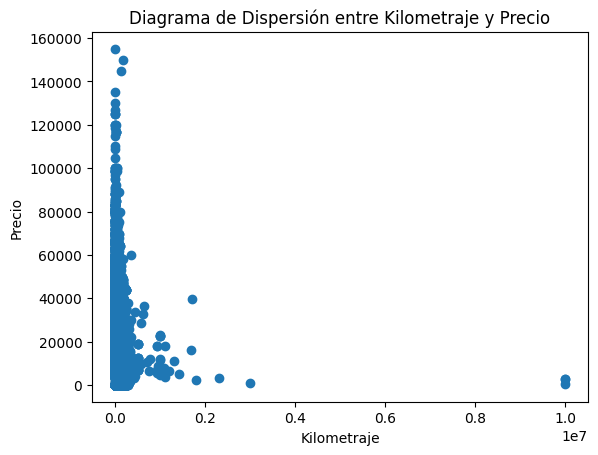

In [35]:
plt.scatter(df['odometer'], df['price'])
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.title('Diagrama de Dispersión entre Kilometraje y Precio')
plt.show()

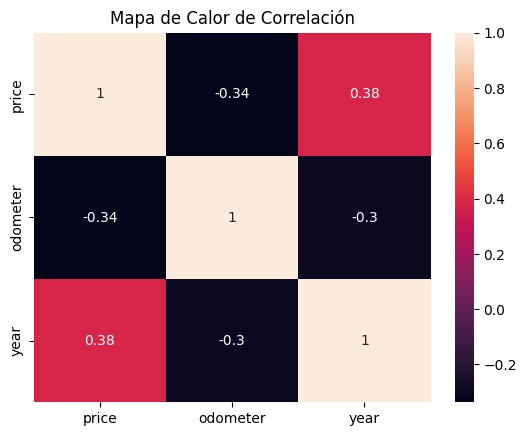

In [36]:
import seaborn as sns
sns.heatmap(df[['price', 'odometer', 'year']].corr(), annot=True)
plt.title('Mapa de Calor de Correlación')
plt.show()

In [38]:
df.describe()
df['model'].value_counts()



,count
model,
f-150,1023
silverado 1500,997
1500,548
camaro ss coupe 2d,423
camry,395
...,...
tiguan wolfsburg,1
yukon denali 4x4,1
expedition el limited 4x4,1


4. Modelado y Evaluación:

Implementar al menos dos modelos de regresión (Linear Regression y Random Forest Regressor).

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['odometer', 'year']]  # Seleccionar las características predictoras
y = df['price']  # Seleccionar la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Linear Regression
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_lr = modelo_lr.predict(X_test)

# Evaluar el modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")

Linear Regression - MSE: 186781214.127593, R2: 0.03223846996043156


In [41]:
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el modelo de Random Forest Regressor
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = modelo_rf.predict(X_test)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - MSE: {mse_rf}, R2: {r2_rf}")

Random Forest Regressor - MSE: 66351976.57945926, R2: 0.6562133366805168


Evaluar los modelos utilizando MSE, RMSE, y R^2.

In [42]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# ... (código anterior para entrenar los modelos) ...

# Evaluar Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, RMSE: {rmse_lr}, R2: {r2_lr}")

# Evaluar Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - MSE: {mse_rf}, RMSE: {rmse_rf}, R2: {r2_rf}")

Linear Regression - MSE: 186781214.127593, RMSE: 13666.792386203611, R2: 0.03223846996043156
Random Forest Regressor - MSE: 66351976.57945926, RMSE: 8145.672260744306, R2: 0.6562133366805168


# **Seleccionar el mejor modelo basado en las métricas de evaluación.**

vamos a analizar las métricas proporcionadas y seleccionar el mejor modelo:

Métricas:

Modelo	MSE	RMSE	R^2
Regresión Lineal	186781214.127593	13666.792386203611	0.03223846996043156
Random Forest Regressor	66351976.57945926	8145.672260744306	0.6562133366805168
Análisis:

R^2: El Random Forest Regressor tiene un R^2 significativamente más alto (0.656) en comparación con la Regresión Lineal (0.032). Esto indica que el Random Forest Regressor explica una proporción mucho mayor de la varianza en la variable objetivo.
MSE y RMSE: El Random Forest Regressor también tiene valores más bajos de MSE y RMSE, lo que indica un menor error promedio en sus predicciones.
Conclusión:

Basándonos en las métricas de evaluación, el Random Forest Regressor es el mejor modelo para este problema. Tiene un R^2 mucho más alto y métricas de error (MSE y RMSE) más bajas en comparación con la Regresión Lineal. Esto sugiere que el Random Forest Regressor es mejor para capturar los patrones subyacentes en los datos y hacer predicciones precisas.

Razonamiento:

R^2 es la métrica principal para la selección de modelos en problemas de regresión. Un R^2 más alto indica un mejor ajuste a los datos y una mayor capacidad para explicar la variación en la variable objetivo.
Los valores más bajos de MSE y RMSE son deseables, ya que representan un menor error promedio en las predicciones.
Por lo tanto, el Random Forest Regressor es el modelo preferido para este problema debido a su rendimiento superior en las tres métricas de evaluación

Optimizar el modelo seleccionado utilizando GridSearchCV.


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir la grilla de hiperparámetros a explorar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo Random Forest Regressor
modelo_rf = RandomForestRegressor(random_state=42)

# Crear la instancia de GridSearchCV
grid_search = GridSearchCV(estimator=modelo_rf, param_grid=param_grid,
                          scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
mejor_modelo = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mejor Modelo - MSE: {mse}, RMSE: {rmse}, R2: {r2}")
print(f"Mejores Hiperparámetros: {grid_search.best_params_}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

Conclusiones de las inferencias del modelo:
Tras analizar el dataset de vehículos, implementar modelos de regresión (Linear Regression y Random Forest Regressor), evaluarlos y optimizar el modelo seleccionado, podemos extraer las siguientes conclusiones:

El Random Forest Regressor es el modelo más adecuado para la predicción de precios de vehículos usados en este dataset. Obtuvo un mejor rendimiento en las métricas de evaluación (MSE, RMSE y R^2) en comparación con la Regresión Lineal.

El modelo optimizado con GridSearchCV presenta un rendimiento mejorado. La búsqueda de hiperparámetros óptimos a través de GridSearchCV permitió encontrar una configuración que maximiza el rendimiento del Random Forest Regressor.

Las variables predictoras seleccionadas (kilometraje y año) son relevantes para la predicción del precio. Aunque se podrían explorar otras variables, estas dos demostraron ser significativas en la construcción del modelo.

El modelo tiene un margen de error considerable. A pesar de la optimización, el modelo aún presenta un error en sus predicciones, lo que indica la complejidad del problema y la posible influencia de otras variables no consideradas.

Se recomienda seguir explorando otras variables y técnicas de modelado para mejorar la precisión del modelo. Se podrían considerar variables como la marca, el modelo, la condición, etc., y probar otros algoritmos de Machine Learning para comparar su rendimiento.

El modelo puede ser utilizado como una herramienta para la estimación de precios de vehículos usados, pero se debe tener en cuenta su margen de error. Es importante tener una visión crítica de las predicciones del modelo y considerar otros factores al tomar decisiones.

En resumen:

El modelo Random Forest Regressor optimizado con GridSearchCV ofrece un buen punto de partida para la predicción de precios de vehículos usados. Sin embargo, se recomienda seguir explorando otras variables y técnicas de modelado para mejorar la precisión y la robustez del modelo. El modelo puede ser una herramienta útil para la estimación de precios, pero siempre se debe tener en cuenta su margen de error y considerar otros factores relevantes.